##  Twitter Sentiment Analysis 

In bussiness Companies use Twitter Sentiment Analysis to develop their business strategies, to assess customers' feelings towards products or brand, how people respond to their campaigns or product launches and also why consumers are not buying certain products. 

## Importing the libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import spacy
from nltk.corpus import stopwords
import string
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

## Functions

In [ ]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

## Read Dataset


In this notebook, I am using tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc. [source of dataset](https://www.kaggle.com/sureshmecad/identify-the-sentiments-analytics-vidhya?select=train.csv) 

It contains a test and train dataset.
Dataset details:

Test dataset:
*  ID: The id of the tweet (9873)
*  tweet :  the text of the tweet (Most viewed this week)


train dataset:
*  ID: The id of the tweet (9873)
*  label: 0-positive and 1-negative 
*  tweet :  the text of the tweet (Most viewed this week)
*  





In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/Thinkful/Data/test.csv' )


train_df=pd.read_csv('/content/drive/MyDrive/Thinkful/Data/train.csv' )

print(test_df.head(5))
print(train_df.head(5))

     id                                                                                                tweet
0  7921                        I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1  7922  currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://insta...
2  7923  I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the ...
3  7924  My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and f...
4  7925                               Been fighting iTunes all night! I only want the music I $&@*# paid for
   id  ...                                                                                                tweet
0   1  ...  #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...
1   2  ...  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...
2   3  ...

In [ ]:
print("Test dataset size:", len(test_df))
print("Train dataset size:", len(train_df))

Test dataset size: 1953
Train dataset size: 7920


In [ ]:
print(" Test dataset Shape:", test_df.shape)
print(" Train dataset Shape:", train_df.shape)

 Test dataset Shape: (1953, 2)
 Train dataset Shape: (7920, 3)


In [ ]:
print("Test dataset info:", test_df.info())
print("Train dataset info:", train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1953 non-null   int64 
 1   tweet   1953 non-null   object
dtypes: int64(1), object(1)
memory usage: 30.6+ KB
Test dataset info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB
Train dataset info: None


 The test dataset has 1953 raw and 2 columns with names ID, and tweet. 
The train dataset has 7920 raw and 3 columns with names ID, Label and tweet. 

## Exploratory Data Analysis (EDA)

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

Handling missing values straight from the start.

In [ ]:
train_df.dropna()
train_df.shape

(7920, 3)

In [ ]:
test_df.dropna()
test_df.shape


(1953, 2)

There is no missing value in the train and test dataset. 

## Plotting the distribution of the target variable.

In [ ]:
positive = train_df[train_df.label == 0].shape[0]
negative = train_df[train_df.label == 1].shape[0]

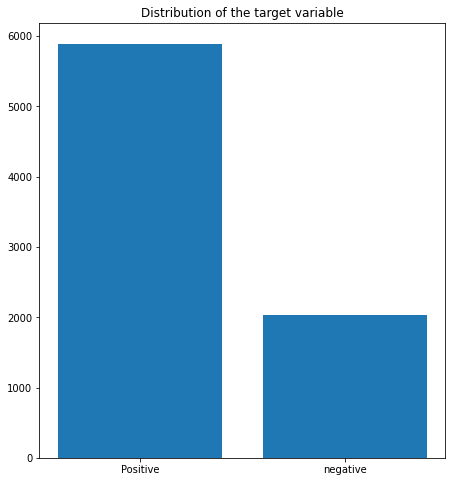

In [ ]:
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
_ = plt.bar(["Positive", "negative"], [positive, negative])
plt.title("Distribution of the target variable")
  
plt.show() 

In [ ]:
def plot_label_based_features(feature):
    x1 = train_df[train_df.label == 1][feature]
    x2 = train_df[train_df.label == 0][feature]
    plt.figure(1, figsize=(16, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x2, alpha=0.5, color="grey", bins=50)
    _ = plt.hist(x1, alpha=0.7, color="red", bins=50)

    return _

In [ ]:
train_df["text_len"] = train_df.tweet.map(lambda x: len(x))

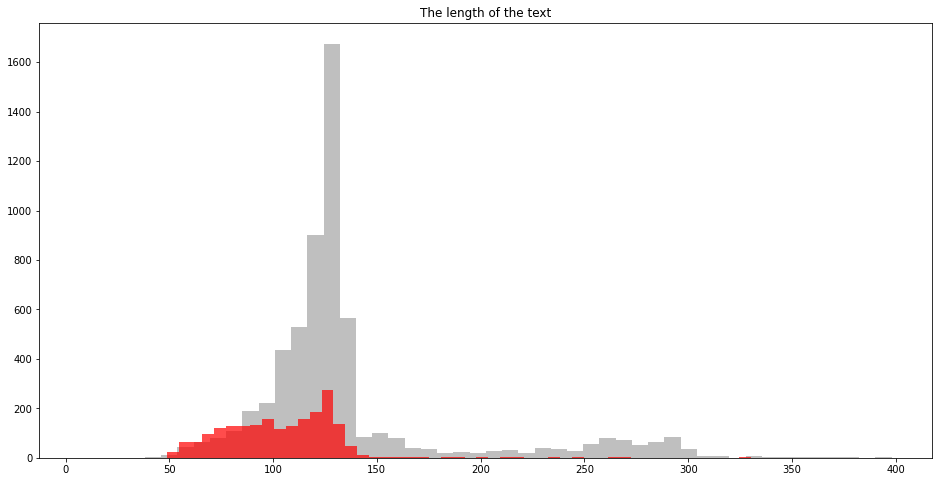

In [ ]:
_ = plot_label_based_features("text_len")
plt.title("The length of the text")
  
plt.show()

## Check the number of words in the text feature.

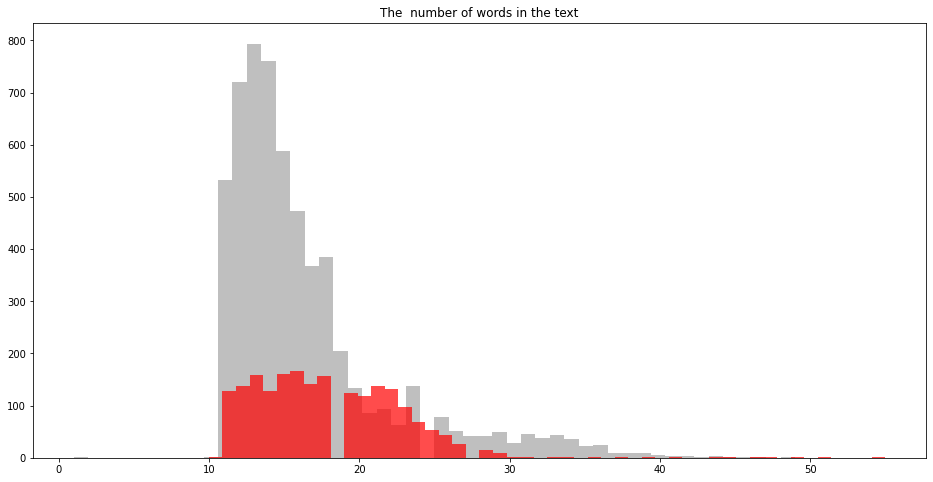

In [ ]:
train_df["words_count"] = train_df.tweet.str.split().map(lambda x: len(x))
_ = plot_label_based_features("words_count")
plt.title("The  number of words in the text")
  
plt.show()

## Count the number of unique words

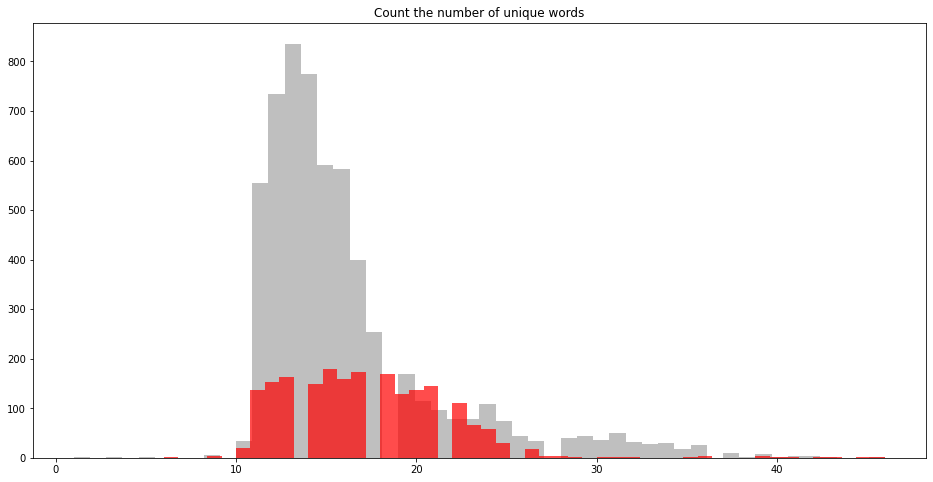

In [ ]:
train_df["unique_word_count"] = train_df.tweet.map(lambda x: len(set(str(x).split())))
_ = plot_label_based_features("unique_word_count")
plt.title("Count the number of unique words")
  
plt.show()

## Mean word length

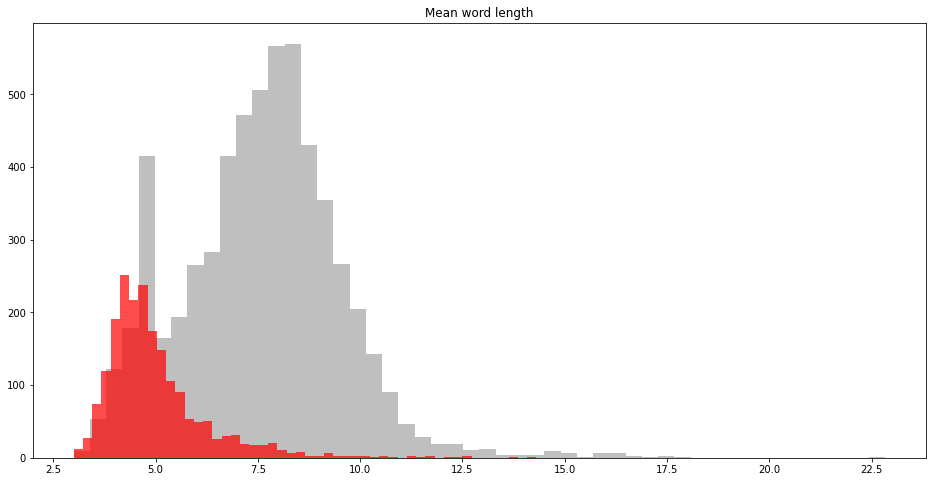

In [ ]:
train_df["mean_word_length"] = train_df.tweet.map(
    lambda x: np.mean([len(w) for w in str(x).split()])
)

_ = plot_label_based_features("mean_word_length")

plt.title("Mean word length")
  
plt.show()

## Punctuation count

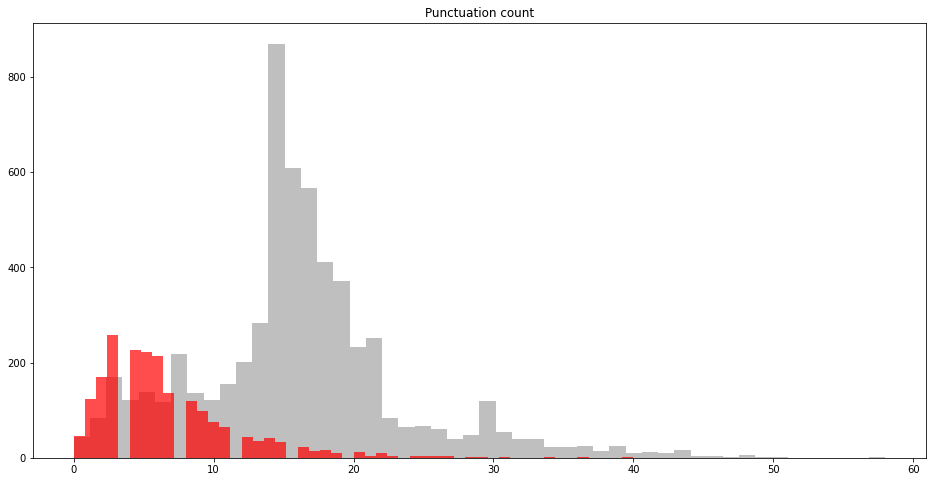

In [ ]:
import string

train_df["punctuation_count"] = train_df["tweet"].map(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)
_ = plot_label_based_features("punctuation_count")

plt.title("Punctuation count")
  
plt.show()

Looking at the plots above we can see that  features have different distributions for the two label categories.



## Text preprocessing / cleaning
Model Accuracy depends on how well the text is cleaned before training any mode
Some of the common text preprocessing / cleaning steps are:
Most of the text data are cleaned by following below steps.

Remove punctuations

Tokenization - Converting a sentence into list of words

Remove stopwords

Lammetization/stemming - Tranforming any form of a word to its root word



## Removal of Punctuations

One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

We also need to carefully choose the list of punctuations to exclude depending on the use case. For example, the string.punctuation in python contains the following punctuation symbols !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

test_df['tweet_punct'] = test_df['tweet'].apply(lambda x: remove_punct(x))
test_df.head(5)

train_df['tweet_punct'] = train_df['tweet'].apply(lambda x: remove_punct(x))
train_df.head(5)


,id,label,tweet,text_len,words_count,unique_word_count,mean_word_length,punctuation_count,tweet_punct
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,128,13,13,8.923077,16,fingerprint Pregnancy Test httpsgooglhMfQV android apps beautiful cute health igers iphoneonly i...
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,131,17,17,6.764706,16,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias… httpinst...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,123,15,15,7.266667,18,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect httpfbme...
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,112,17,15,5.647059,17,Im wired I know Im George I was made that way iphone cute daventry home httpinstagrampLiujSk
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,124,23,22,4.434783,5,What amazing service Apple wont even talk to me about a question I have unless I pay them for t...



## Lower Casing and Tokenization

Lower casing is a common text preprocessing technique. The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

This is more helpful for text featurization techniques like frequency, tfidf as it helps to combine the same words together thereby reducing the duplication and get correct counts / tfidf values.

This may not be helpful when we do tasks like Part of Speech tagging (where proper casing gives some information about Nouns and so on) and Sentiment Analysis (where upper casing refers to anger and so on)

By default, lower casing is done my most of the modern day vecotirzers and tokenizers like sklearn TfidfVectorizer and Keras Tokenizer. So we need to set them to false as needed depending on our use case.

In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

test_df['tweet_tokenized'] = test_df['tweet_punct'].apply(lambda x: tokenization(x.lower()))
test_df.head()

train_df['tweet_tokenized'] = train_df['tweet_punct'].apply(lambda x: tokenization(x.lower()))
train_df.head()

,id,label,tweet,text_len,words_count,unique_word_count,mean_word_length,punctuation_count,tweet_punct,tweet_tokenized
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,128,13,13,8.923077,16,fingerprint Pregnancy Test httpsgooglhMfQV android apps beautiful cute health igers iphoneonly i...,"[fingerprint, pregnancy, test, httpsgooglhmfqv, android, apps, beautiful, cute, health, igers, i..."
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,131,17,17,6.764706,16,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias… httpinst...,"[finally, a, transparant, silicon, case, thanks, to, my, uncle, yay, sony, xperia, s, sonyexperi..."
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,123,15,15,7.266667,18,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect httpfbme...,"[we, love, this, would, you, go, talk, makememories, unplug, relax, iphone, smartphone, wifi, co..."
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,112,17,15,5.647059,17,Im wired I know Im George I was made that way iphone cute daventry home httpinstagrampLiujSk,"[im, wired, i, know, im, george, i, was, made, that, way, iphone, cute, daventry, home, httpinst..."
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,124,23,22,4.434783,5,What amazing service Apple wont even talk to me about a question I have unless I pay them for t...,"[what, amazing, service, apple, wont, even, talk, to, me, about, a, question, i, have, unless, i..."


## Removal of stopwords

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

"i, me, my, myself, we, our, ours, ourselves,..."

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
new_words=("and","a'","in", "that", "is'","s'","up'","i'"," '","aaaaaggghhhhh","aaaaah","aaaarggg","aani", "aaronmk","ab","abensonpictwittercomdomzlxxa","abil","abionicchip","abl")
for i in new_words:
    stopwords.append(i)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#from nltk.corpus import stopwords
#", ".join(stopwords.words('english'))

In [ ]:
STOPWORDS = stopwords
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in text if word not in STOPWORDS])

test_df["tweet_wo_stop"] = test_df["tweet_tokenized"].apply(lambda text: remove_stopwords(text))
test_df.head()

train_df["tweet_wo_stop"] = train_df["tweet_tokenized"].apply(lambda text: remove_stopwords(text))
train_df.head()

,id,label,tweet,text_len,words_count,unique_word_count,mean_word_length,punctuation_count,tweet_punct,tweet_tokenized,tweet_wo_stop
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,128,13,13,8.923077,16,fingerprint Pregnancy Test httpsgooglhMfQV android apps beautiful cute health igers iphoneonly i...,"[fingerprint, pregnancy, test, httpsgooglhmfqv, android, apps, beautiful, cute, health, igers, i...",fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,131,17,17,6.764706,16,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias… httpinst...,"[finally, a, transparant, silicon, case, thanks, to, my, uncle, yay, sony, xperia, s, sonyexperi...",finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,123,15,15,7.266667,18,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect httpfbme...,"[we, love, this, would, you, go, talk, makememories, unplug, relax, iphone, smartphone, wifi, co...",love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,112,17,15,5.647059,17,Im wired I know Im George I was made that way iphone cute daventry home httpinstagrampLiujSk,"[im, wired, i, know, im, george, i, was, made, that, way, iphone, cute, daventry, home, httpinst...",im wired know im george made way iphone cute daventry home httpinstagrampliujsk
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,124,23,22,4.434783,5,What amazing service Apple wont even talk to me about a question I have unless I pay them for t...,"[what, amazing, service, apple, wont, even, talk, to, me, about, a, question, i, have, unless, i...",amazing service apple wont even talk question unless pay stupid support


## Lemmatization

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

As a result, this one is generally slower than stemming process. So depending on the speed requirement, we can choose to use either stemming or lemmatization.

Let us use the WordNetLemmatizer in nltk to lemmatize our sentences


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

test_df["tweet_lemmatized"] = test_df["tweet_wo_stop"].apply(lambda text: lemmatize_words(text))
test_df.head(5)

train_df["tweet_lemmatized"] = train_df["tweet_wo_stop"].apply(lambda text: lemmatize_words(text))
train_df.head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,label,tweet,text_len,words_count,unique_word_count,mean_word_length,punctuation_count,tweet_punct,tweet_tokenized,tweet_wo_stop,tweet_lemmatized
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,128,13,13,8.923077,16,fingerprint Pregnancy Test httpsgooglhMfQV android apps beautiful cute health igers iphoneonly i...,"[fingerprint, pregnancy, test, httpsgooglhmfqv, android, apps, beautiful, cute, health, igers, i...",fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,131,17,17,6.764706,16,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias… httpinst...,"[finally, a, transparant, silicon, case, thanks, to, my, uncle, yay, sony, xperia, s, sonyexperi...",finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,123,15,15,7.266667,18,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect httpfbme...,"[we, love, this, would, you, go, talk, makememories, unplug, relax, iphone, smartphone, wifi, co...",love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,112,17,15,5.647059,17,Im wired I know Im George I was made that way iphone cute daventry home httpinstagrampLiujSk,"[im, wired, i, know, im, george, i, was, made, that, way, iphone, cute, daventry, home, httpinst...",im wired know im george made way iphone cute daventry home httpinstagrampliujsk,im wired know im george made way iphone cute daventry home httpinstagrampliujsk
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,124,23,22,4.434783,5,What amazing service Apple wont even talk to me about a question I have unless I pay them for t...,"[what, amazing, service, apple, wont, even, talk, to, me, about, a, question, i, have, unless, i...",amazing service apple wont even talk question unless pay stupid support,amazing service apple wont even talk question unless pay stupid support


## Removal of HTML Tags

One another common preprocessing technique that will come handy in multiple places is removal of html tags. This is especially useful, if we scrap the data from different websites. We might end up having html strings as part of our text.

First, let us try to remove the HTML tags using regular expressions.


In [ ]:
import re

def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)


test_df["tweet_whtml"] = test_df["tweet_lemmatized"].apply(lambda text: remove_html(text))
test_df.head(5)

train_df["tweet_whtml"] = train_df["tweet_lemmatized"].apply(lambda text: remove_html(text))
train_df.head(5)

,id,label,tweet,text_len,words_count,unique_word_count,mean_word_length,punctuation_count,tweet_punct,tweet_tokenized,tweet_wo_stop,tweet_lemmatized,tweet_whtml
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,128,13,13,8.923077,16,fingerprint Pregnancy Test httpsgooglhMfQV android apps beautiful cute health igers iphoneonly i...,"[fingerprint, pregnancy, test, httpsgooglhmfqv, android, apps, beautiful, cute, health, igers, i...",fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,131,17,17,6.764706,16,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias… httpinst...,"[finally, a, transparant, silicon, case, thanks, to, my, uncle, yay, sony, xperia, s, sonyexperi...",finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,123,15,15,7.266667,18,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect httpfbme...,"[we, love, this, would, you, go, talk, makememories, unplug, relax, iphone, smartphone, wifi, co...",love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,112,17,15,5.647059,17,Im wired I know Im George I was made that way iphone cute daventry home httpinstagrampLiujSk,"[im, wired, i, know, im, george, i, was, made, that, way, iphone, cute, daventry, home, httpinst...",im wired know im george made way iphone cute daventry home httpinstagrampliujsk,im wired know im george made way iphone cute daventry home httpinstagrampliujsk,im wired know im george made way iphone cute daventry home httpinstagrampliujsk
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,124,23,22,4.434783,5,What amazing service Apple wont even talk to me about a question I have unless I pay them for t...,"[what, amazing, service, apple, wont, even, talk, to, me, about, a, question, i, have, unless, i...",amazing service apple wont even talk question unless pay stupid support,amazing service apple wont even talk question unless pay stupid support,amazing service apple wont even talk question unless pay stupid support


## Removal of URLs

Next preprocessing step is to remove any URLs present in the data. Since we are doing a twitter analysis, then there is a good chance that the tweet will have some URL in it. Probably we might need to remove them for our further analysis.

We can use the below code snippet to do that.


In [ ]:
def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

test_df["tweet_wURL"] = test_df["tweet_whtml"].apply(lambda text: remove_URL(text))
test_df.head(5)

train_df["tweet_wURL"] = train_df["tweet_whtml"].apply(lambda text: remove_URL(text))
train_df.head(5)

,id,label,tweet,text_len,words_count,unique_word_count,mean_word_length,punctuation_count,tweet_punct,tweet_tokenized,tweet_wo_stop,tweet_lemmatized,tweet_whtml,tweet_wURL
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,128,13,13,8.923077,16,fingerprint Pregnancy Test httpsgooglhMfQV android apps beautiful cute health igers iphoneonly i...,"[fingerprint, pregnancy, test, httpsgooglhmfqv, android, apps, beautiful, cute, health, igers, i...",fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,131,17,17,6.764706,16,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias… httpinst...,"[finally, a, transparant, silicon, case, thanks, to, my, uncle, yay, sony, xperia, s, sonyexperi...",finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,123,15,15,7.266667,18,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect httpfbme...,"[we, love, this, would, you, go, talk, makememories, unplug, relax, iphone, smartphone, wifi, co...",love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,112,17,15,5.647059,17,Im wired I know Im George I was made that way iphone cute daventry home httpinstagrampLiujSk,"[im, wired, i, know, im, george, i, was, made, that, way, iphone, cute, daventry, home, httpinst...",im wired know im george made way iphone cute daventry home httpinstagrampliujsk,im wired know im george made way iphone cute daventry home httpinstagrampliujsk,im wired know im george made way iphone cute daventry home httpinstagrampliujsk,im wired know im george made way iphone cute daventry home httpinstagrampliujsk
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,124,23,22,4.434783,5,What amazing service Apple wont even talk to me about a question I have unless I pay them for t...,"[what, amazing, service, apple, wont, even, talk, to, me, about, a, question, i, have, unless, i...",amazing service apple wont even talk question unless pay stupid support,amazing service apple wont even talk question unless pay stupid support,amazing service apple wont even talk question unless pay stupid support,amazing service apple wont even talk question unless pay stupid support


## Removal of Emojis

With more and more usage of social media platforms, there is an explosion in the usage of emojis in our day to day life as well. Probably we might need to remove these emojis for some of our textual analysis.

Thanks to this code, please find below a helper function to remove emojis from our text.

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

test_df["tweet_clean"] = test_df["tweet_wURL"].apply(lambda text: remove_emoji(text))
test_df.head(5)

train_df["tweet_clean"] = train_df["tweet_wURL"].apply(lambda text: remove_emoji(text))
train_df.head(5)

,id,label,tweet,text_len,words_count,unique_word_count,mean_word_length,punctuation_count,tweet_punct,tweet_tokenized,tweet_wo_stop,tweet_lemmatized,tweet_whtml,tweet_wURL,tweet_clean
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #iger...,128,13,13,8.923077,16,fingerprint Pregnancy Test httpsgooglhMfQV android apps beautiful cute health igers iphoneonly i...,"[fingerprint, pregnancy, test, httpsgooglhmfqv, android, apps, beautiful, cute, health, igers, i...",fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly i...
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias…...,131,17,17,6.764706,16,Finally a transparant silicon case Thanks to my uncle yay Sony Xperia S sonyexperias… httpinst...,"[finally, a, transparant, silicon, case, thanks, to, my, uncle, yay, sony, xperia, s, sonyexperi...",finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompyget...
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connec...,123,15,15,7.266667,18,We love this Would you go talk makememories unplug relax iphone smartphone wifi connect httpfbme...,"[we, love, this, would, you, go, talk, makememories, unplug, relax, iphone, smartphone, wifi, co...",love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr....,112,17,15,5.647059,17,Im wired I know Im George I was made that way iphone cute daventry home httpinstagrampLiujSk,"[im, wired, i, know, im, george, i, was, made, that, way, iphone, cute, daventry, home, httpinst...",im wired know im george made way iphone cute daventry home httpinstagrampliujsk,im wired know im george made way iphone cute daventry home httpinstagrampliujsk,im wired know im george made way iphone cute daventry home httpinstagrampliujsk,im wired know im george made way iphone cute daventry home httpinstagrampliujsk,im wired know im george made way iphone cute daventry home httpinstagrampliujsk
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19....,124,23,22,4.434783,5,What amazing service Apple wont even talk to me about a question I have unless I pay them for t...,"[what, amazing, service, apple, wont, even, talk, to, me, about, a, question, i, have, unless, i...",amazing service apple wont even talk question unless pay stupid support,amazing service apple wont even talk question unless pay stupid support,amazing service apple wont even talk question unless pay stupid support,amazing service apple wont even talk question unless pay stupid support,amazing service apple wont ev

In [ ]:
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

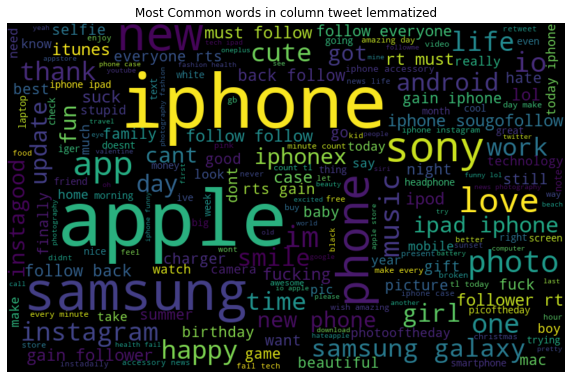

In [ ]:
#visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in test_df['tweet_clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column tweet lemmatized")
plt.show()

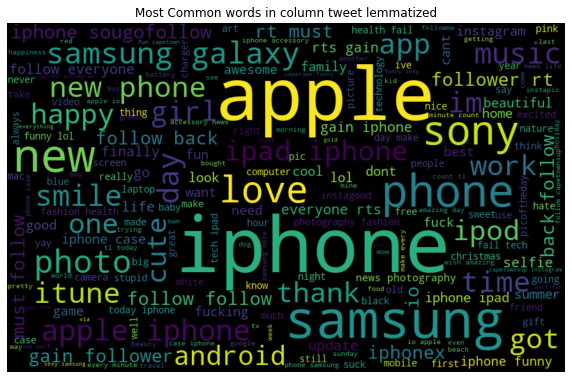

In [ ]:
#visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in train_df['tweet_clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column tweet lemmatized")
plt.show()

## Now When Our Data Is Cleaned & Ready We Start Our Text Analysis

I will do my analysis on "tweet_lematized" column
in above plots we can see most of the words are positive or neutral. With happy, love and phone names being the most frequent ones.

# Extracting Features from Cleaned Tweets
## A - Bag-of-Words Features

##  Bag-Of-Words feature matrix - For column - combine_df['tweet_lemmatized']

## A Building model using Bag-of-Words features

## For columns "train_df['tweet_clean']"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def count_vect(data, ngrams=(1, 1)):
    count_vectorizer = CountVectorizer(ngram_range=ngrams)
    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

## Test to see if CountVectorizer worked as expected

In [ ]:
train_counts, count_vectorizer = count_vect(train_df['tweet_clean'])
test_counts = count_vectorizer.transform(test_df['tweet_clean'])

In [ ]:
train_df.shape

(7920, 15)

In [ ]:
bag_df=pd.DataFrame(train_counts.todense(), columns=count_vectorizer.get_feature_names())

In [ ]:
bag_df.head(5)

,aa,aaaahhhhhhh,aah,aalborg,aand,aapl,aarhus,aaron,aaronbrandt,aaronskip,aarp,aarrrggghhhh,aashamsakal,aayp,ab,abah,abajournal,abareta,abb,abc,abdullahoashraf,abe,abeecwaldon,aber,abercrombie,abfad,abfadofficial,abi,ability,abit,able,ableton,aboard,aboutalook,aboutdamntime,abouttime,abouttonight,abscbn,absence,absolute,...,zunehd,zurich,zx,ädg,äf,än,äx,äö,åb,åfä,åg,åiam,åmi,åru,åä,çeşme,öh,öq,ör,österreich,öt,öxb,ıcecream,αγάπη,азаза,андроид,гуфи,красавчик,лондонград,любовь,україна,шашлык,яблоко,ים,ישראל,أطفال,خطعربي,سعادة,فرح,كويت
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bag_test_df=pd.DataFrame(test_counts.todense(), columns=count_vectorizer.get_feature_names())

In [ ]:
train_counts.todense().shape

(7920, 20573)

In [ ]:
len(train_counts.todense()[0].tolist()[0])

20573

In [ ]:
train_df.tweet_clean[0]

'fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [ ]:
print(train_counts.todense()[0][0:].sum())

13


In [ ]:
train_counts, count_vectorizer = count_vect(train_df['tweet_clean'], ngrams=(1, 2))
test_counts = count_vectorizer.transform(test_df['tweet_clean'])

print(train_counts.todense()[0][0:].sum())

25


In [ ]:
train_counts, count_vectorizer = count_vect(train_df['tweet_clean'], ngrams=(1, 2))
test_counts = count_vectorizer.transform(test_df['tweet_clean'])
print(train_counts.todense()[0][0:].sum())

25


## B - TF-IDF Features

TF-IDF (term frequency-inverse document frequency) ) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

It has many uses, most importantly in automated text analysis, and is very useful for scoring words in machine learning algorithms for Natural Language Processing (NLP) [for more information click here](https://monkeylearn.com/blog/what-is-tf-idf/#:~:text=TF%2DIDF%20is%20a%20statistical,in%20a%20collection%20of%20documents.&text=It%20works%20by%20increasing%20proportionally,documents%20that%20contain%20the%20word.).



## TF-IDF feature matrix - For columns "combine_df['tweet_clean']"

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


def tfidf(data, ngrams=(1, 1)):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrams)
    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer


train_tfidf, tfidf_vectorizer = tfidf(train_df['tweet_clean'])
test_tfidf = tfidf_vectorizer.transform(test_df['tweet_clean'])

## Test to see if TfidfVectorizer worked as expected

In [ ]:
[x for x in train_tfidf.todense()[0][0:].tolist()[0] if x != 0]

[0.1812246422530457,
 0.22067400179851354,
 0.2074429468787806,
 0.19203898798274577,
 0.3726409311459786,
 0.23626188843641832,
 0.4226546435061181,
 0.22733386783685428,
 0.08257685168420192,
 0.23123835461318515,
 0.22924426462087996,
 0.4226546435061181,
 0.3493858792257109]

In [ ]:
print(train_tfidf.todense()[0][0:].sum())

3.375371903488551


In [ ]:
train_tfidf, tfidf_vectorizer = tfidf(train_df['tweet_clean'], ngrams=(1, 2))
test_tfidf = tfidf_vectorizer.transform(test_df['tweet_clean'])

print(train_tfidf.todense()[0][0:].sum())

4.766199834444527


## Dimensionality reduction using truncated SVD (aka LSA).

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD).

Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

In [ ]:
X_counts = train_counts
X_tfidf = train_tfidf
y = train_df["label"].values

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label: idx for idx, label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ["orange", "blue", "blue"]
    if plot:
        plt.scatter(
            lsa_scores[:, 0],
            lsa_scores[:, 1],
            s=8,
            alpha=0.8,
            c=test_labels,
            cmap=matplotlib.colors.ListedColormap(colors),
        )
        red_patch = mpatches.Patch(color="orange", label="negative")
        green_patch = mpatches.Patch(color="blue", label="positive")
        plt.legend(handles=[red_patch, green_patch], prop={"size": 16})

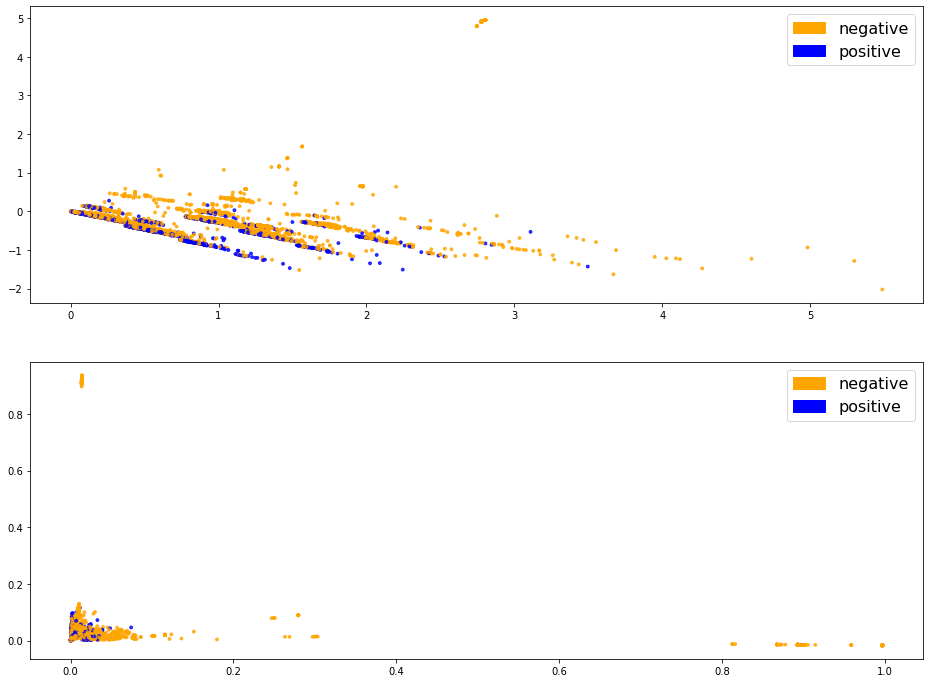

In [ ]:
plt.figure(1, figsize=(16, 12))
plt.subplot(2, 1, 1)
plot_LSA(X_counts, y)
plt.subplot(2, 1, 2)
plot_LSA(X_tfidf, y)

## TF IDF in this situation has better linearly separable classes.

## Logistic Regression Model Building: Twitter Sentiment Analysis

## Basic Logistic Regression

With CountVectorizer

In [ ]:
from sklearn.model_selection import train_test_split
X = train_counts

y = train_df["label"].values

X_train_counts, X_test, y_train_counts, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

In [ ]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_counts, y_train_counts)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

f1score = f1_score(y_test, y_pred)
print(f"Counts Model F1 Score: {f1score * 100} %")

Counts Model F1 Score: 78.78103837471784 %


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1047,  113],
       [  75,  349]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8813131313131313

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1160
           1       0.76      0.82      0.79       424

    accuracy                           0.88      1584
   macro avg       0.84      0.86      0.85      1584
weighted avg       0.89      0.88      0.88      1584



With TfidfVectorizer

In [ ]:
X = train_tfidf
y = train_df["label"].values

X_train_tfidf, X_test, y_train_tfidf, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

In [ ]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

f1score = f1_score(y_test, y_pred)
print(f"Tfidf Model F1 Score: {f1score * 100} %")

Tfidf Model F1 Score: 79.8196166854566 %


Test score of the model with TfidfVectorizer is slightly better than CountVectorizer. Hovewerthere is room for improvement.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1051,  109],
       [  70,  354]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8869949494949495

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1160
           1       0.76      0.83      0.80       424

    accuracy                           0.89      1584
   macro avg       0.85      0.87      0.86      1584
weighted avg       0.89      0.89      0.89      1584

